In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Gather

### twitter_archive_enhanced file

In [2]:
rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')


### image prediction file

In [3]:
# Use requests to programmatically download the file stored in the service

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


In [4]:
img_prediction = pd.read_csv('image_predictions.tsv', sep = "\t")


### Information quried from tweet API

In [6]:
consumer_key = 'HIDEN'
consumer_secret = 'HIDEN'
access_token = 'HIDEN'
access_secret = 'HIDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

tweet_ids = rate_dogs.tweet_id.values
api = tweepy.API(auth, wait_on_rate_limit=True)



In [ ]:
len(tweet_ids)


In [ ]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### Create a dataframe contains `tweet_id`, `retweet_count`, `favorite_count` information
Read tweet_json.txt file created above line by line, extract the three features by using `json.loads`

In [87]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet_id = json.loads(line)['id']
        retweet_count = json.loads(line)['retweet_count']
        favorite_count = json.loads(line)['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
    retweet_favrt = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing

In [88]:
rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [89]:
img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [90]:
retweet_favrt

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8198,37580
1,892177421306343426,6060,32307
2,891815181378084864,4009,24347
3,891689557279858688,8357,40932
4,891327558926688256,9049,39123
5,891087950875897856,3005,19678
6,890971913173991426,1985,11501
7,890729181411237888,18211,63431
8,890609185150312448,4122,27056
9,890240255349198849,7118,31000


In [91]:
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [92]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [93]:
retweet_favrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [94]:
rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [95]:
img_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [96]:
retweet_favrt.describe()

,tweet_id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2881.845528,7855.204108
std,6.824243e+16,4868.418450,12175.108241
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,580.000000,1366.000000
50%,7.185406e+17,1346.000000,3421.000000
75%,7.986825e+17,3358.000000,9626.000000
max,8.924206e+17,82570.000000,162400.000000


In [97]:
rate_dogs['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [98]:
rate_dogs['rating_denominator'].sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [99]:
rate_dogs[rate_dogs['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [100]:
rate_dogs[rate_dogs['name'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [101]:
rate_dogs['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Daisy          7
Buddy          7
an             7
Bailey         7
Milo           6
Rusty          6
Dave           6
Jax            6
Koda           6
Leo            6
Jack           6
Scout          6
Bella          6
Oscar          6
Stanley        6
Larry          5
            ... 
Harrison       1
this           1
Gilbert        1
Storkson       1
Chubbs         1
Ike            1
Rinna          1
Grizzwald      1
Vixen          1
Darrel         1
Lambeau        1
Benny          1
Bauer          1
Tuco           1
Mya            1
Mauve          1
Furzey         1
Brandi         1
Chadrick       1
Marty          1
Hero           1
Willow         1
Emanuel        1
Sunshine       1
Todo           1
Remy           1
Skye           1
Margo         

In [102]:
rate_dogs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [103]:
rate_dogs[rate_dogs['in_reply_to_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


#### Quality

##### `WeRateDogs_archive` table
- non-original tweet records included in `rate_dogs` table
- unnecessary columns for analysis, 
'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
- erraneous representations of null values in `name` in `WeRateDogs_archive` table
- mistakes on `name` (names as 'a', 'an', 'the', 'this')

- erraneous datatype of columns`tweet_id`,`timestamp` in `WeRateDogs_archive` table
- mistakes on minimum values and maximum values `rating_numerator`	`rating_denominator`
- some records that are not rate for dogs
-

##### `image_prediction` table
- missing records(2075 with 2356 in `WeRateDogs` table
- incorrect datatype of `tweet_id`


##### `retweet_favorite` table
- missing records for unsuccessful query from API. Tweets not available(deleted)
- incorrect datatype of `tweet_id`



#### Tidiness
- in `WeRateDogs_archive`, columns `doggo`, `floofer`, `pupper`, `puppo` should be in one column
- All three tables can be combined

# Cleaning


In [104]:
rate_dogs_clean = rate_dogs.copy()
img_predict_clean = img_prediction.copy()
retweet_favrt_clean = retweet_favrt.copy()

### Quality1: non-original tweet records included in `rate_dogs` table

#### Define:
Remove all the tweets those are retweets and replys to others in `rate_dogs_clean`

#### Code:

In [105]:

rate_dogs_clean = rate_dogs_clean[rate_dogs_clean['retweeted_status_id'].isna()]
rate_dogs_clean = rate_dogs_clean[rate_dogs_clean['in_reply_to_status_id'].isna()]


#### Test:

In [106]:
rate_dogs_clean['retweeted_status_id'].notna().sum()

0

### Quality2: Unnecessary columns for analysis in `rate_dogs_clean` table

#### Define:
Drop the columns not necessary for the following analysis

#### Code:

In [107]:
rate_dogs_clean = rate_dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',\
                                        'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test:

In [108]:
rate_dogs_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality 3: erraneous representations of null values in name in `rate_dogs_clean` table


#### Define: 
Replace all the 'None' s in `name` with NaN

#### Code:

In [109]:
rate_dogs_clean['name'] = rate_dogs_clean['name'].replace({"None":np.nan}).values

#### Test:

In [110]:
rate_dogs_clean[rate_dogs_clean.name == 'None']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality 4: incorrect names in `rate_dogs_clean` table
#### Define: 
replace all the 'a', 'an', 'the', 'this' to NaN

#### Code:

In [111]:
rate_dogs_clean['name'] = rate_dogs_clean['name'].replace(['a','an', 'the', 'this', 'my'], np.nan)

#### Test:

In [112]:
rate_dogs_clean.name.value_counts()


Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Stanley        6
Koda           6
Bo             6
Oscar          6
Jax            6
Bailey         6
Bella          6
Chester        5
Louis          5
Rusty          5
Leo            5
Scout          5
Buddy          5
Bentley        5
Milo           5
Dave           5
Winnie         4
Cassie         4
Chip           4
              ..
Antony         1
Seamus         1
Sweets         1
Moofasa        1
Todo           1
Emanuel        1
Jennifur       1
Willow         1
Leonard        1
Jeffrie        1
Longfellow     1
Timber         1
Bobb           1
Bradlay        1
Kobe           1
Mimosa         1
Grizzwald      1
Darrel         1
Lambeau        1
Benny          1
Bauer          1
Tuco           1
Mya            1
Mauve          1
Furzey         1
Brandi         1
Vixen          1
Chadrick      

### Tidiness 1: Put all `doggo`, `floofer`, `pupper`, `puppo`  in one column
#### Define:

 Melt the `doggo`, `floofer`, `pupper`, `puppo` in *dog_stage*

#### Code:

In [113]:
# Create a new dataframe with the dog_stage value is not 'None' 
rate_dogs_clean_new = pd.melt(rate_dogs_clean, id_vars = ['tweet_id','timestamp','text', 'rating_numerator', 'rating_denominator','name'],\
                          value_vars = ['doggo', 'pupper', 'floofer', 'puppo'],  value_name='dog_stage')
rate_dogs_clean_new = rate_dogs_clean_new[rate_dogs_clean_new['dog_stage'] != 'None']


In [114]:
rate_dogs_clean_new['tweet_id'].duplicated().sum()

11

11 duplicated records occurs due to the `melt` method, it might because of more than one value were assigned to the same tweet during the text extracting. Since the duplicated ones are relatively small part of the dataset, we are moving forward to drop the duplicated ones and and the value of *dog_stage* for these records will turn to null when merge into the original dataset in the following step.

In [115]:
rate_dogs_clean_new = rate_dogs_clean_new.drop_duplicates('tweet_id', keep = False)
rate_dogs_clean_new['tweet_id'].duplicated().sum()

0

In [116]:
# We only need 'dog_stage' columns to be merged to original dataset
rate_dogs_clean_new = rate_dogs_clean_new[['tweet_id','dog_stage']]

In [117]:
rate_dogs_clean = rate_dogs_clean.merge(rate_dogs_clean_new, on ="tweet_id",  how = "left")

In [118]:
rate_dogs_clean['tweet_id'].duplicated().sum()

0

In [119]:
# drop all the columns for dog stage informations: 'doggo', 'floofer', 'pupper', 'puppo'
rate_dogs_clean = rate_dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)


#### Test:

In [120]:
rate_dogs_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Quality 5: Correct the erraneous datatype in `rate_dogs_clean` table: *tweet_id*, *timestamp*
#### Define:
change the datatype of *tweet_id*, *timestamp*, *dog_stage*

#### Code:

In [121]:
#to datetime
rate_dogs_clean.timestamp = pd.to_datetime(rate_dogs_clean.timestamp)
# to string
rate_dogs_clean['tweet_id'] = rate_dogs_clean['tweet_id'].astype(str)
# dog_stage to Category
rate_dogs_clean['dog_stage'] = rate_dogs_clean['dog_stage'].astype('category')

#### Test:

In [122]:
rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 7 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1423 non-null object
dog_stage             325 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 116.9+ KB


### Quality 6 : mistakes on *rating_numerator*  ,  *rating_denominator*

In [123]:
# check the records those rating_denominator != 10
rate_dogs_clean[rate_dogs_clean['rating_denominator'] != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
339,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84,70,NaN,NaN
403,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN
700,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165,150,NaN,NaN
853,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",9,11,NaN,NaN
904,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204,170,NaN,NaN
948,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN
985,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN
1011,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,99,90,NaN,NaN
1036,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,80,80,NaN,NaN
1056,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro...",45,50,NaN,NaN


In [124]:
rate_dogs_clean[rate_dogs_clean['rating_denominator'] != 10].text.values

array([ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of pu

In [125]:
rate_dogs_clean[rate_dogs_clean['rating_numerator'] > 14]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
339,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84,70,NaN,NaN
403,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN
528,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN
586,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper
700,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165,150,NaN,NaN
770,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN
904,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204,170,NaN,NaN
985,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN
1011,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,99,90,NaN,NaN
1036,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,80,80,NaN,NaN


After checking all text for the unusual ratings, we noticed that some were from incorrect text extract, ann others are due to more than one dogs were present on the image, *rating_numerator* need to be corrected correct one
#### Define: 
replece the rating_numerator with correct ones created using regex

#### Code:

In [126]:
rating = rate_dogs_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rate_dogs_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
rate_dogs_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

#### Test:


In [127]:
rate_dogs_clean['rating_numerator'].sort_values()

246        0.0
2076       1.0
2003       1.0
1838       1.0
2079       1.0
1625       1.0
1990       2.0
1526       2.0
2090       2.0
1670       2.0
1523       2.0
2067       2.0
2051       2.0
1826       2.0
1981       2.0
972        3.0
2046       3.0
1928       3.0
1369       3.0
1946       3.0
1678       3.0
1031       3.0
1454       3.0
1183       3.0
2075       3.0
1696       3.0
1650       3.0
1983       3.0
587        3.0
1596       3.0
         ...  
215       14.0
160       14.0
350       14.0
137       14.0
120       14.0
477       14.0
1376      14.0
67        14.0
73        14.0
418       14.0
95        14.0
838       14.0
101       14.0
106       14.0
380       14.0
403       24.0
1210      44.0
1056      45.0
985       50.0
1129      60.0
1036      80.0
339       84.0
1602      88.0
1011      99.0
1399     121.0
1540     144.0
700      165.0
904      204.0
1821     420.0
770     1776.0
Name: rating_numerator, Length: 2097, dtype: float64

### Quality 7: incorrect datatype in `img_predict_clean`
#### Define: 
change erraneous datatype of *tweet_id*  in `img_predict_clean`

#### Code:

In [128]:
img_predict_clean['tweet_id'] = img_predict_clean['tweet_id'].astype(str)

#### Test:

In [129]:
img_predict_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Quality 8: unnecessary columns in `img_predict_clean` table
#### Define:
remove the columns *p2*, *p2_conf*, *p2_dog*, *p3*, *p3_conf*, *p3_dog that are unnecessary for the following analysis

#### Code:

In [130]:
img_predict_clean = img_predict_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], axis = 1)

#### Test:

In [131]:
img_predict_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


### Quality9: erraneous datatype of *tweet_id* in `retweet_favorite` table

#### Define:
change the datatype of *tweet_id* to string

#### Code:

In [132]:
retweet_favrt_clean['tweet_id'] = retweet_favrt_clean['tweet_id'].astype(str)

#### Test:

In [133]:
retweet_favrt_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Tidiness 2: all the three tables could be in one table


#### Define: 

combine `img_predict_clean` with `rate_dogs_clean`, set as `twitter_archive_master`

merge `retweet_favrt_clean` into `twitter_archive_master`

#### Code:


In [134]:
#merge img_predict_clean into rate_dogs_clean

twitter_archive_master = rate_dogs_clean.merge(img_predict_clean, on = 'tweet_id', how = 'left')
twitter_archive_master = twitter_archive_master.merge(retweet_favrt_clean, how = 'left', on = 'tweet_id')


### Quality 10: non-dogs tweets

#### Define:
remove records for non-dogs tweets(those records show p1_dog prediction are non dogs and rating are less than 6 )

#### Code:

In [135]:
# get the index for records that the image predict is not dogs and rating_numerator are less than 6
index_non_dogs = twitter_archive_master[(twitter_archive_master.p1_dog == False) & (twitter_archive_master.rating_numerator < 6)].index

In [136]:
twitter_archive_master = twitter_archive_master.drop(index_non_dogs)

#### Test:

In [137]:
twitter_archive_master.head()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8198.0,37580.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,6060.0,32307.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4009.0,24347.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8357.0,40932.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9049.0,39123.0


### Quality 10 : Missing values in `img_predict_clean`table

#### Define: 
remove all the records don't contain the image prediction information

#### Code:

In [138]:
#drop all rows where value for *p1* is NaN
twitter_archive_master = twitter_archive_master[twitter_archive_master.p1.notna()]

#### Test:

In [139]:
twitter_archive_master.p1.isna().sum()

0

### Quality 11: Missing values in `retweet_favorite` table
As all the missing values in `retweet_favrt_clean` table comes from the unsuccessful query on the API and all the tweets have been deleted, we are not able to get the retweet and favorite information for these records, we are moving forward with all these records dropped.
#### Define:
drop all the records with missing values in retweet_count

#### Code:

In [140]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['retweet_count'].notna()]

In [141]:
twitter_archive_master.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8198.0,37580.0


#### Test:

In [142]:
twitter_archive_master.retweet_count.isna().sum()

0

## Save the cleaned data to twitter_archive_master.csv

In [143]:
twitter_archive_master.to_csv('twitter_archive_master', index = False)

### Data Analysis and Visualization

In [144]:
df = pd.read_csv('twitter_archive_master')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 13 columns):
tweet_id              1904 non-null int64
timestamp             1904 non-null object
text                  1904 non-null object
rating_numerator      1904 non-null float64
rating_denominator    1904 non-null float64
name                  1349 non-null object
dog_stage             291 non-null object
jpg_url               1904 non-null object
p1                    1904 non-null object
p1_conf               1904 non-null float64
p1_dog                1904 non-null bool
retweet_count         1904 non-null float64
favorite_count        1904 non-null float64
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 180.4+ KB


#### Question 1: Which breed of dog get hightest rate

In [146]:
#creat a dataframe only contains True dog prediction where p1 indicates the breed of dog 
breed_rating = df[(df['p1_dog'] == True) & (df['rating_numerator'] < 20)]

In [147]:
breed_rating['p1'].value_counts().shape

(111,)

In [148]:
#get the top 10 breed of dog
top10_rated_dog_names = breed_rating.groupby('p1').mean().sort_values(ascending=False, \
                                                                      by = 'rating_numerator').iloc[:10,1].index


In [149]:
# get the data for other breeds of dog except the top 10
def dog_type_finder(dog_name, top10):
    if dog_name in top10:
        return dog_name
    else:
        return "Other"

breed_rating['dog_type'] = breed_rating['p1'].apply(dog_type_finder, top10 = top10_rated_dog_names)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


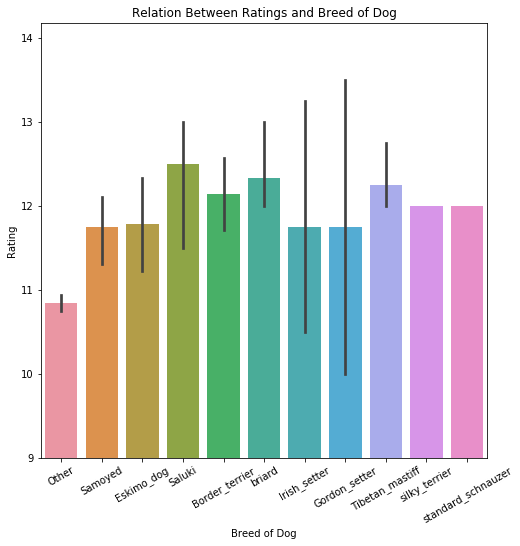

In [150]:
# plot the barplot for mean rate 
plt.figure(figsize = (8,8))
g = sns.barplot(x = "dog_type" ,y="rating_numerator", data = breed_rating)
g.set_xticklabels(g.get_xticklabels(), rotation=30);
g.set_ylim(9,);
g.set_ylabel('Rating');
g.set_xlabel('Breed of Dog');
g.set_title('Relation Between Ratings and Breed of Dog');

### Relation between ratings and favorite counts

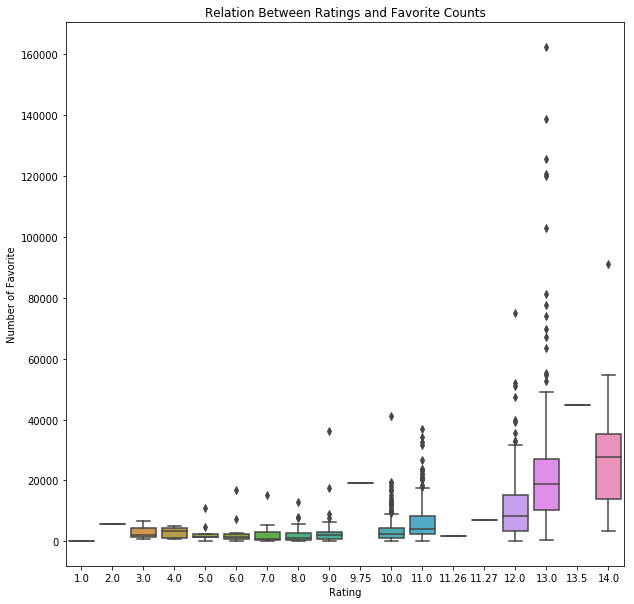

In [151]:
plt.figure(figsize = (10,10))
g2 = sns.boxplot(y = 'favorite_count', x = 'rating_numerator', data = breed_rating)
g2.set_xlabel('Rating');
g2.set_ylabel('Number of Favorite');
g2.set_title('Relation Between Ratings and Favorite Counts');

### Distribution of Dog Stages

In [152]:
dog_stage = df.groupby('dog_stage').count()

Text(0.5,1,'Distribution of Dog Stages')

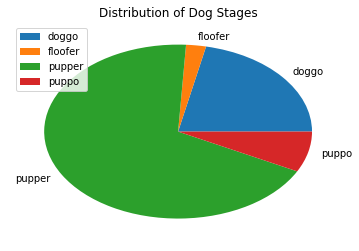

In [153]:
g3 = dog_stage.plot.pie('tweet_id');
plt.ylabel('');
plt.title('Distribution of Dog Stages')